# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix

# Loading the Dataset

In [2]:
df = pd.read_csv("Twitter Sentiments.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
#DataType Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the Dataset

In [4]:
#Remove Patterns in the input text
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#Remove Twitter Handles(@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
#Remove Special Character,numbers and punctuations

df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
#Remove Short Words

df['clean_tweet'] = df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
#Individual Words considered as tokens

tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
#Stem the Words

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence :[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
#Combine Words into Single Sentence 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [13]:
#Visulalize the frequent Words

all_words = " ".join([sentence for sentence in df['clean_tweet']])

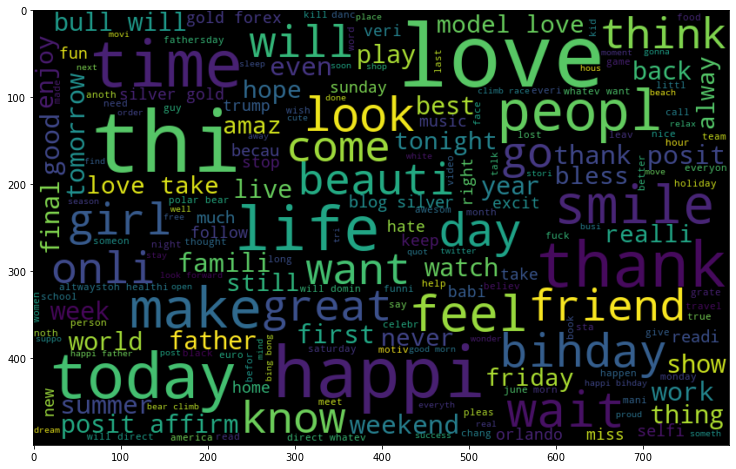

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')

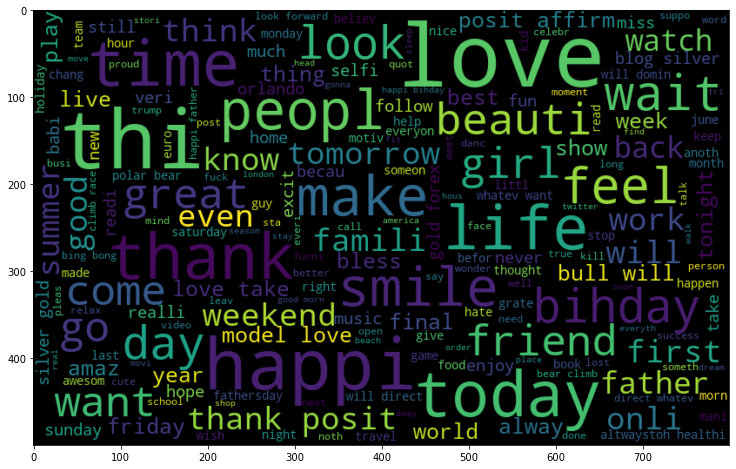

In [15]:
#Frequent Words Visulaization for +ve
#Visulalize the frequent Words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')

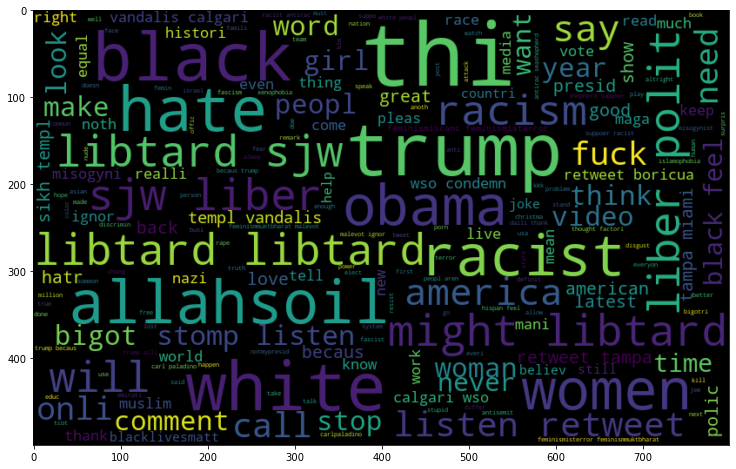

In [16]:
#Frequent Words Visulaization for -ve
#Visulalize the frequent Words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')

In [17]:
#Extrat the Hashtag

def hashtag_extract(tweets):
    hashtags = []
    #Loop words in the Tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
#Extract Hashtags from non racist/sexist tweets

ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#Extract Hashtags from  racist/sexist tweets

ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [19]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [20]:
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

In [21]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [22]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag' : list(freq.keys()),
                 'Count' : list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

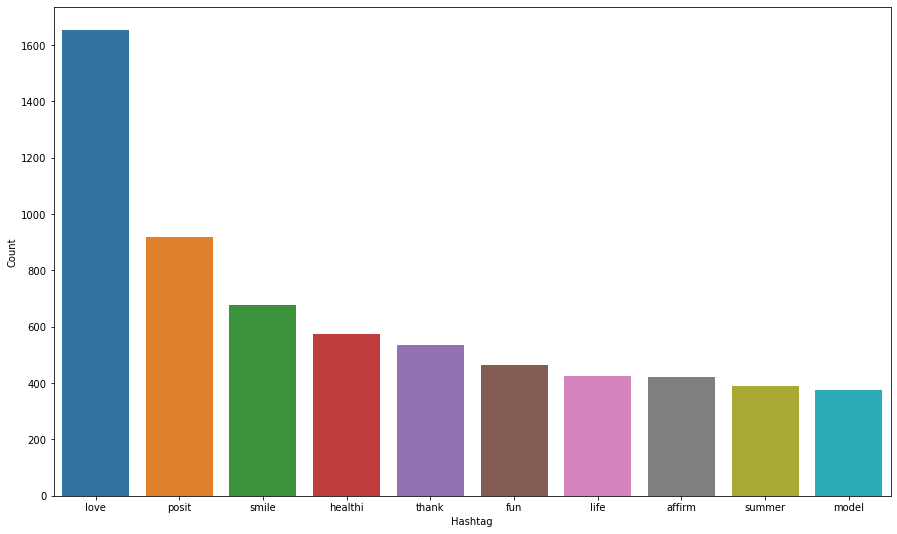

In [23]:
#Select top 10 hashtags

d = d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x="Hashtag",y="Count")

In [24]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag' : list(freq.keys()),
                 'Count' : list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

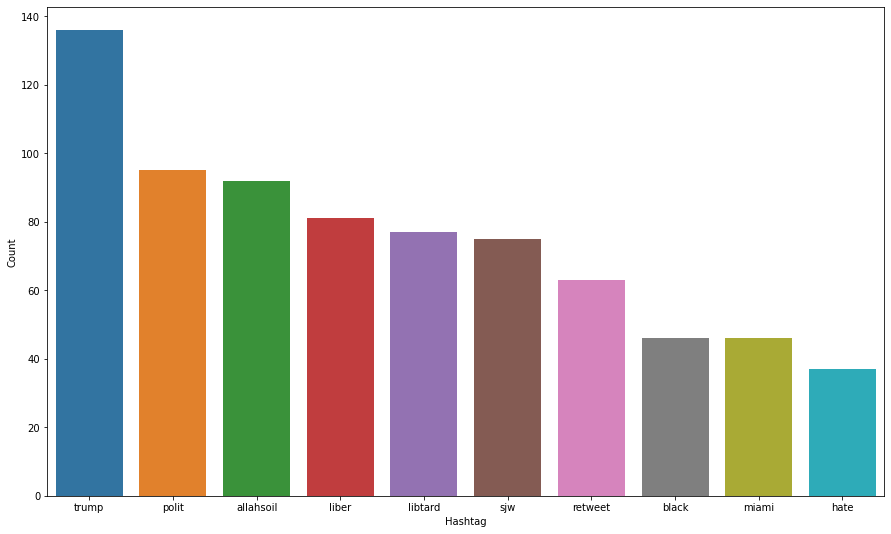

In [25]:
#Select top 10 hashtags

d = d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x="Hashtag",y="Count")

# Input Split

In [26]:
#Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [27]:
#bow[0].toarray()

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,df['label'],random_state=42,test_size=0.25)

# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [30]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
#Testing
pred = model.predict(x_test)
f1_score(y_test,pred)

0.49763033175355453

In [32]:
accuracy_score(y_test,pred)

0.9469403078463271

In [33]:
#Use Probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1]>=0.3
pred = pred.astype(np.int)
f1_score(y_test,pred)

0.5545722713864307

In [34]:
accuracy_score(y_test,pred)

0.9433112251282693

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

In [36]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:, 1]
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.9435615066950319


In [38]:
print(confusion_matrix(y_test, y_pred))

[[7235  197]
 [ 254  305]]


# KNeighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [40]:
from sklearn import metrics
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9404329871104993

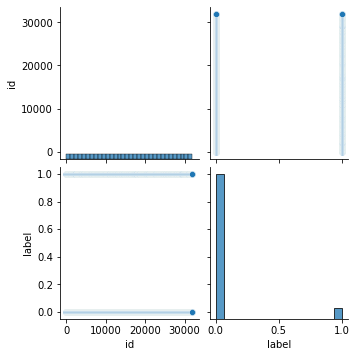

In [41]:
sns.pairplot(df)

# Visualization on Logistic Regression

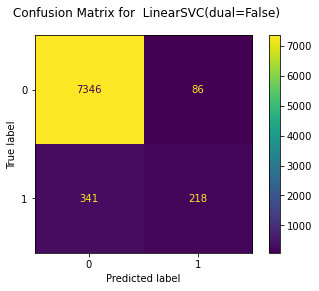

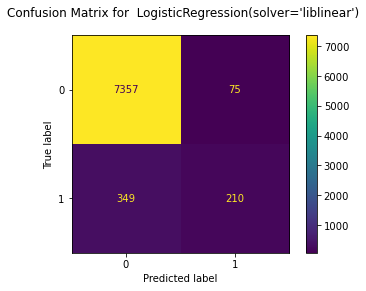

In [42]:
classifiers=[ LinearSVC(dual=False),LogisticRegression(solver="liblinear",max_iter=100)]
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    fig=plot_confusion_matrix(clf, x_test, y_test)
    fig.figure_.suptitle("Confusion Matrix for  " + str(clf))
    plt.show()

# Visualization on knn Neighbors

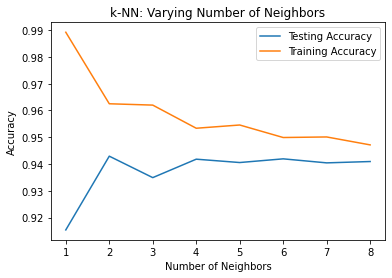

In [43]:
import matplotlib.pyplot as plt

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()